This is sourcecode of the figures used in the medium article [Principal Component Analysis (explained)](https://medium.com/@thomas.zilliox/principal-component-analysis-explained-23f97ecce067)

#General IDEA

## Generate the gaussian data

In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Parameters for the Gaussian distributions
mean_x = 0     # Mean of x-values
mean_y = 0     # Mean of y-values
std_dev_x = 3  # Standard deviation for the x-axis (wider)
std_dev_y = 1  # Standard deviation for the y-axis (narrower)
num_points = 1500  # Number of points


# Generate random points for x and y axes with different variances
x_data = np.random.normal(mean_x, std_dev_x, num_points)
y_data = np.random.normal(mean_y, std_dev_y, num_points)

# Combine x and y data into a matrix of shape (num_points, 2)
data = np.vstack((x_data, y_data))

# Define the rotation angle in radians (e.g., 45 degrees = pi/4)
angle = np.radians(30)

# Create the 2D rotation matrix
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])

# Rotate the dataset by multiplying with the rotation matrix
rotated_data = np.dot(rotation_matrix, data)

## Compute the PCA and the corresponding projection

In [3]:
from sklearn.decomposition import PCA

# Apply PCA
data = rotated_data.T  # Shape (num_points, 2)
pca = PCA(n_components=1)  # We want to keep 1 component
pca_result = pca.fit_transform(data)

# Get the mean of the data for centering the PCA arrow
mean = np.mean(data, axis=0)

# Get the principal component vector
principal_component = pca.components_[0]

# Project the data points onto the principal component
projected_points = np.dot(data - mean, principal_component.reshape(-1, 1)) * principal_component + mean

## Plot the example

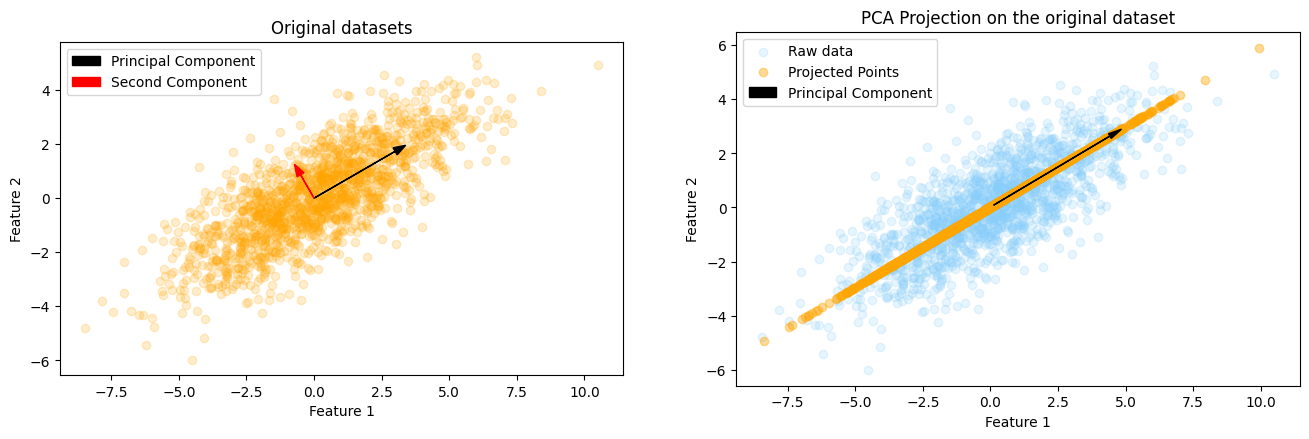

In [4]:
import matplotlib.pyplot as plt
import math

# Create a scatter plot for the rotated data
plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)

plt.scatter(rotated_data[0, :], rotated_data[1, :], color='orange', alpha=0.2)

# Add labels and title
plt.title('First and second component of the distribution')
plt.title('Original datasets')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Ensure equal scaling to emphasize the rotated ellipse
plt.gca().set_aspect('equal', adjustable='box')

# Plot first component
first_component_x = 3
first_component_y = first_component_x * math.tan(angle)
plt.arrow(0, 0, first_component_x, first_component_y, head_width=0.3,color="black",label='Principal Component')

# Plot second component
first_component_x = -0.5
first_component_y = first_component_x * math.tan(angle+(math.pi/2))
plt.arrow(0, 0, first_component_x, first_component_y, head_width=0.3,color="red",label='Second Component')

# Show the plot
plt.legend()

# Plot the projected points
plt.subplot(1, 2, 2)

plt.scatter(rotated_data[0, :], rotated_data[1, :], color='lightskyblue', alpha=0.2,label='Raw data')

plt.scatter(projected_points[:, 0], projected_points[:, 1],
            color='orange', alpha=0.4, label='Projected Points')

# Draw the PCA arrow
arrow_start = mean
arrow_end = mean + principal_component * 5  # Scale the arrow for visibility
plt.arrow(arrow_start[0], arrow_start[1],
          arrow_end[0] - arrow_start[0],
          arrow_end[1] - arrow_start[1],
          color='black', head_width=0.2, head_length=0.5,
          label='Principal Component')

# Add labels, legend, and title
plt.title('PCA Projection on the original dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()


# Show the plot
plt.show()

# MNIST

## Get the dataset

In [29]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset from sklearn
mnist = fetch_openml('mnist_784', version=1)

# Extract the images and labels
X = mnist.data  # Shape: (70000, 784), each row is a 28x28 image flattened
y = mnist.target  # Labels corresponding to the digits (these are strings)

## Get the image

We will get the first image of an 8 to illustrate the effect of PCA

In [39]:
# Convert labels to strings if they are not already
y = y.astype(str)

# Select the first image of the digit '8'
digit_8_index = np.where(y == '8')[0][0]  # Corrected to handle string labels
digit_8 = X.iloc[digit_8_index].values  # This is a 1D array of length 784 (28x28 image)

# # Reshape the image for plotting
original_image = digit_8.reshape(28, 28)

## Apply PCA

In [49]:
# Select all images of the digit '8'
digit_8_indices = np.where(y == '8')[0]
digit_8_images = X.iloc[digit_8_indices]  # This is a 2D array (many '8' images)

# Apply PCA to the set of '8' images
pca = PCA()
pca.fit(digit_8_images)  # Fit PCA on the entire set of '8' images

PCA()

## Plot the reconstructions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


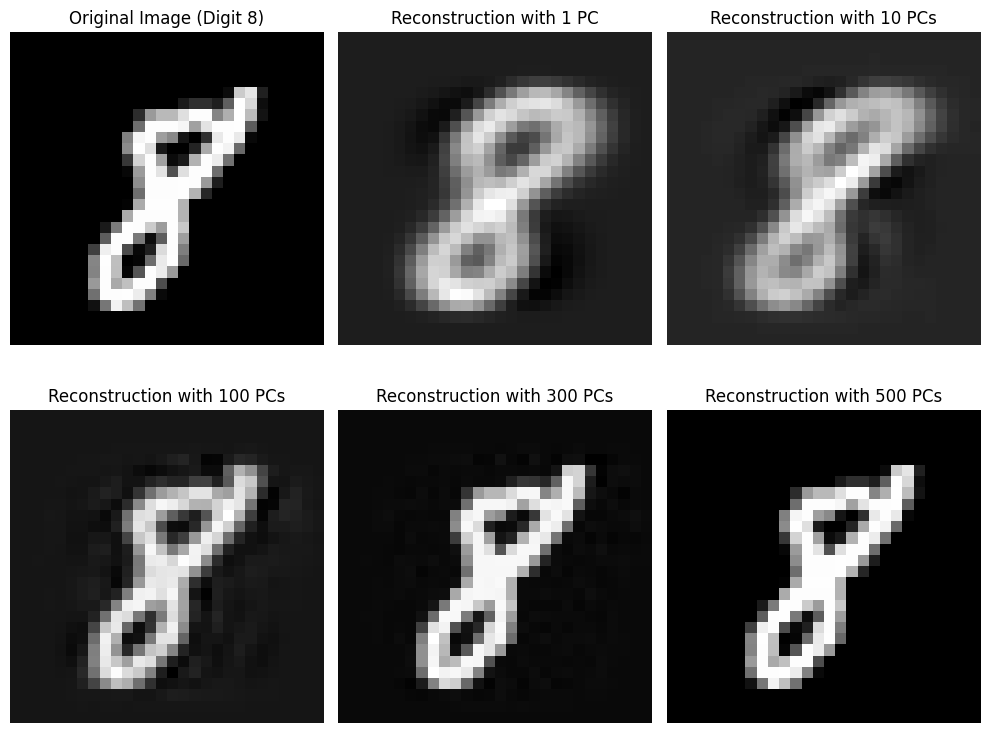

Explained variance ratio (first 10 components): [0.12327706 0.07735829 0.06436831 0.05716212 0.03932181 0.03254773
 0.02774017 0.02594552 0.02467275 0.02160131]


In [80]:
# Take the first '8' image for reconstruction
first_digit_8 = digit_8_images.iloc[0].values

# Function to reconstruct the image using a given number of principal components
def reconstruct_image(pca, image, num_components):
    pca = PCA(n_components=num_components)
    reduced = pca.fit_transform(digit_8_images)  # Fit PCA on the dataset
    transformed = pca.transform(image.reshape(1, -1))  # Transform the specific image
    reconstructed = pca.inverse_transform(transformed)  # Reconstruct the image
    return reconstructed.reshape(28, 28)  # Reshape to original dimensions

# Reconstruct the image using different numbers of principal components
reconstruction_1 = reconstruct_image(pca, first_digit_8, 1)
reconstruction_10 = reconstruct_image(pca, first_digit_8, 10)
reconstruction_100 = reconstruct_image(pca, first_digit_8, 100)
reconstruction_300 = reconstruct_image(pca, first_digit_8, 300)
reconstruction_500 = reconstruct_image(pca, first_digit_8, 500)

# Plot the original and reconstructed images
plt.figure(figsize=(10, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(first_digit_8.reshape(28, 28), cmap='gray')
plt.title('Original Image (Digit 8)')
plt.axis('off')

# Reconstruction using 1 principal component
plt.subplot(2, 3, 2)
plt.imshow(reconstruction_1, cmap='gray')
plt.title('Reconstruction with 1 PC')
plt.axis('off')

# Reconstruction using 10 principal components
plt.subplot(2, 3, 3)
plt.imshow(reconstruction_10, cmap='gray')
plt.title('Reconstruction with 10 PCs')
plt.axis('off')

# Reconstruction using 100 principal components
plt.subplot(2, 3, 4)
plt.imshow(reconstruction_100, cmap='gray')
plt.title('Reconstruction with 100 PCs')
plt.axis('off')

# Reconstruction using 300 principal components
plt.subplot(2, 3, 5)
plt.imshow(reconstruction_300, cmap='gray')
plt.title('Reconstruction with 300 PCs')
plt.axis('off')

# Reconstruction using 500 principal components
plt.subplot(2, 3, 6)
plt.imshow(reconstruction_500, cmap='gray')
plt.title('Reconstruction with 500 PCs')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print explained variance ratio for analysis
print("Explained variance ratio (first 10 components):", pca.explained_variance_ratio_[:10])

## Plot and compute the reconstruction error

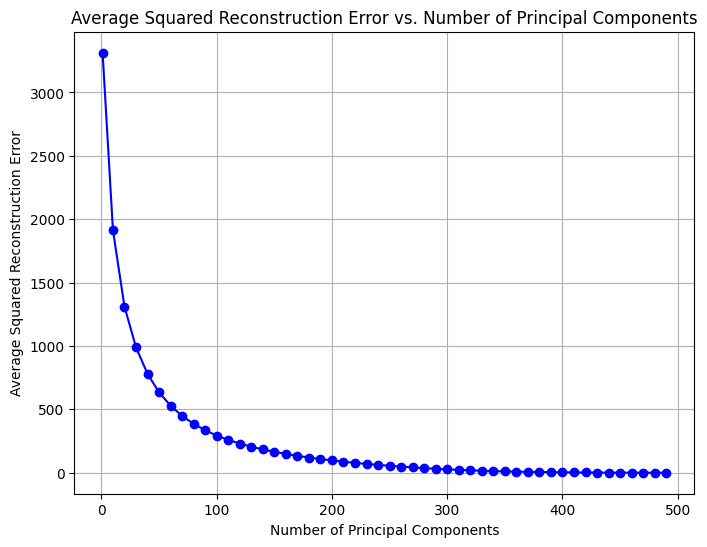

Reconstruction error with 1 components: 3313.198984
Reconstruction error with 10 components: 1912.233933
Reconstruction error with 20 components: 1309.948520
Reconstruction error with 30 components: 989.306173
Reconstruction error with 40 components: 779.986532
Reconstruction error with 50 components: 634.246008
Reconstruction error with 60 components: 528.630311
Reconstruction error with 70 components: 448.140316
Reconstruction error with 80 components: 386.104335
Reconstruction error with 90 components: 335.219437
Reconstruction error with 100 components: 293.450649
Reconstruction error with 110 components: 259.090402
Reconstruction error with 120 components: 230.448437
Reconstruction error with 130 components: 205.526073
Reconstruction error with 140 components: 184.175402
Reconstruction error with 150 components: 165.119476
Reconstruction error with 160 components: 148.454944
Reconstruction error with 170 components: 133.616400
Reconstruction error with 180 components: 120.156602
R

In [66]:
# Function to compute the average squared reconstruction error
def compute_reconstruction_error(pca, images, num_components):
    pca = PCA(n_components=num_components)
    reduced = pca.fit_transform(images)  # Project all images onto principal subspace
    reconstructed = pca.inverse_transform(reduced)  # Reconstruct all images

    # Compute the squared reconstruction error for each image
    squared_errors = np.square(images - reconstructed)

    # Compute the average squared reconstruction error across all images
    avg_squared_error = np.mean(squared_errors)
    return avg_squared_error

# List of components to test
components_list = [1, 10, 100, 500]
components_list = np.insert(np.arange(10, 501, 10), 0, 1)

# Store the average squared reconstruction errors for each number of components
reconstruction_errors = []

# Compute the reconstruction error for each number of components
for num_components in components_list:
    error = compute_reconstruction_error(pca, digit_8_images, num_components)
    reconstruction_errors.append(error)

# Plot the average squared reconstruction error vs. number of principal components
plt.figure(figsize=(8, 6))
plt.plot(components_list, reconstruction_errors, marker='o', linestyle='-', color='b')
plt.title('Average Squared Reconstruction Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average Squared Reconstruction Error')
plt.grid(True)
plt.show()

# Print the reconstruction errors for inspection
for num_components, error in zip(components_list, reconstruction_errors):
    print(f"Reconstruction error with {num_components} components: {error:.6f}")

### Reconstruction error for 1,10,20,...,490,500 samples

In [68]:
# List of components to test
components_list = np.insert(np.arange(10, 501, 10), 0, 1)

# Store the average squared reconstruction errors for each number of components
reconstruction_errors_line = []

# Compute the reconstruction error for each number of components
for num_components in components_list:
    error = compute_reconstruction_error(pca, digit_8_images, num_components)
    reconstruction_errors_line.append(error)

### Reconstruction error for 1,10,100,300,500 samples

In [83]:
# List of components to test
components_list_images = [1, 10, 100, 300, 500]

# Store the average squared reconstruction errors for each number of components
reconstruction_errors_images = []

# Compute the reconstruction error for each number of components
for num_components in components_list_images:
    error = compute_reconstruction_error(pca, digit_8_images, num_components)
    reconstruction_errors_images.append(error)

# Print the reconstruction errors for inspection
for num_components, error in zip(components_list_images, reconstruction_errors_images):
    print(f"Reconstruction error with {num_components} components: {error:.6f}")

Reconstruction error with 1 components: 3313.198984
Reconstruction error with 10 components: 1912.233021
Reconstruction error with 100 components: 293.527935
Reconstruction error with 300 components: 26.845263
Reconstruction error with 500 components: 0.057511


### Plot of the reconstruction errors

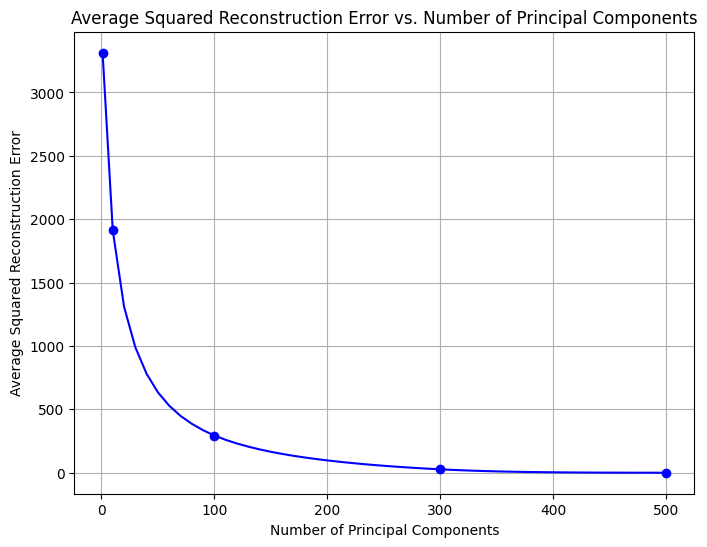

In [82]:
# Plot the average squared reconstruction error vs. number of principal components
plt.figure(figsize=(8, 6))
plt.plot(components_list, reconstruction_errors_line, linestyle='-', color='b')
plt.plot(components_list_images, reconstruction_errors_images, marker='o', linestyle='', color='b')
plt.title('Average Squared Reconstruction Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average Squared Reconstruction Error')
plt.grid(True)
plt.show()